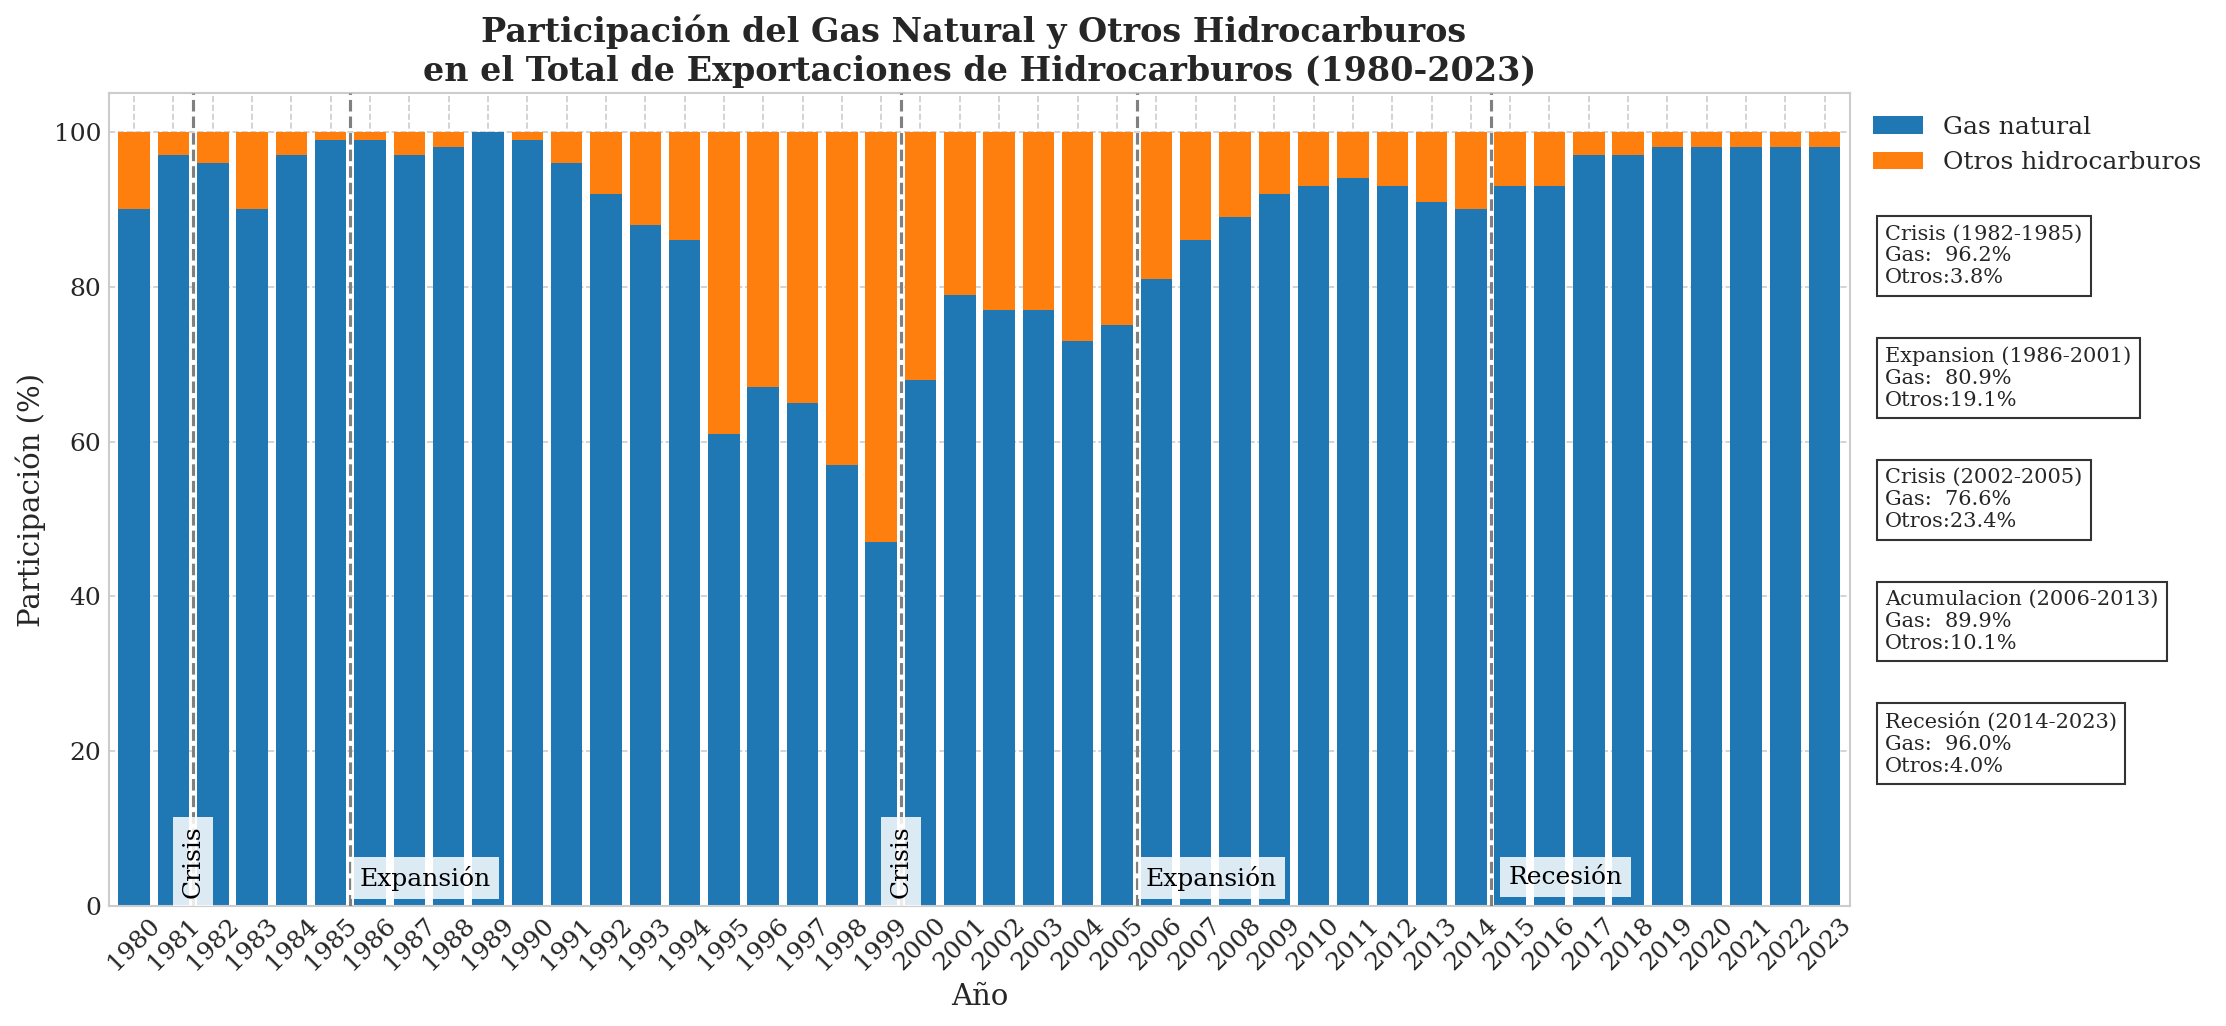

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3, os

# ── 1. Parámetros y rutas ─────────────────────────────────────────────────────
CRISIS_YEARS_NEOLIBERALISMO=slice(1982, 1986)
EXPANSION=slice(1986,2002)
CRISIS_YEARS     = slice(2002, 2006)   # 2002-2005
POST_YEARS       = slice(2006, 2014)   # 2006-2013
RECESION_YEARS   = slice(2014, 2024)   # 2014-2023

OUTPUT_DIR = "../../../../assets/tesis/serie_completa/participacion_gas_hidrocarburos_total_exportaciones_hidrocarburos"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ── 2. Estilo profesional ─────────────────────────────────────────────────────
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update({
    "font.family": "serif", "font.size": 12,
    "axes.titlesize": 16, "axes.labelsize": 14,
    "grid.linestyle": "--", "lines.linewidth": 2,
    "figure.dpi": 150, "savefig.bbox": "tight"
})

# ── 3. Carga de datos ─────────────────────────────────────────────────────────
with sqlite3.connect("../../../../db/proyectomacro.db") as conn:
    df = pd.read_sql_query(
        "SELECT * FROM participacion_gas_hidrocarburos_total_exportaciones_hidrocarburos",
        conn
    )

df.set_index("año", inplace=True)           # índice = año

# ── 4. Participaciones (%) ────────────────────────────────────────────────────
pct = df[["exportacion_gas", "otros_hidrocarburos"]]  # ya están en %
hitos_offset = {
    1981: (0, 0.10),
    1985: (1.9, 0.05),
    1999: (0, 0.10),
    2005: (1.9, 0.05),
    2014: (1.9, 0.05)
}
# ── 5. Estadísticas promedio por periodo ──────────────────────────────────────
avg_crisis_neoliberalismo=pct.loc[CRISIS_YEARS_NEOLIBERALISMO].mean()
avg_expansion = pct.loc[EXPANSION].mean()
avg_crisis     = pct.loc[CRISIS_YEARS].mean()
avg_post       = pct.loc[POST_YEARS].mean()
avg_recesion   = pct.loc[RECESION_YEARS].mean()

# ── 6. Gráfico stacked-bar ────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(15, 7))
pct.plot(kind="bar", stacked=True, ax=ax, width=0.8)

ax.set_ylabel("Participación (%)")
ax.set_xlabel("Año")
ax.set_title(
    "Participación del Gas Natural y Otros Hidrocarburos \n"
    "en el Total de Exportaciones de Hidrocarburos (1980-2023)",
    fontweight="bold"
)
ax.legend(["Gas natural", "Otros hidrocarburos"], loc="upper left",
          bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

# ── 6.5. Líneas verticales y texto de hitos (posición basada en índice) ─────
hitos_v = {1981: "Crisis", 1985: "Expansión", 1999: "Crisis", 2005: "Expansión", 2014: "Recesión"}

fig.subplots_adjust(right=0.8)              # deja espacio para las cajas

for yr, lbl in hitos_v.items():
    if yr in pct.index:
        idx = pct.index.get_loc(yr)
        y_max=ax.get_ylim()[1]
        ax.axvline(
            x=idx + 0.5, color="gray", ls="--", lw=1.5, zorder=5
        )
        dx,dy=hitos_offset.get(yr,(0,0.5))
        ax.text(
            idx + 0.5+dx,dy, lbl, rotation=0 if lbl=='Expansión' or lbl=='Recesión' else 90, ha="center", va="top",
            fontsize=12, color="black",
            transform=ax.get_xaxis_transform(), clip_on=False,
            bbox=dict(facecolor="white", alpha=0.85, edgecolor="none"),
            zorder=6
        )

# ── 7. Cajas de resumen ───────────────────────────────────────────────────────
stats_crisis_neoliberalismo=(
    f"Gas:  {avg_crisis_neoliberalismo.exportacion_gas:.1f}%\n"
    f"Otros:{avg_crisis_neoliberalismo.otros_hidrocarburos:.1f}%"
)
stats_expansion = (
    f"Gas:  {avg_expansion.exportacion_gas:.1f}%\n"
    f"Otros:{avg_expansion.otros_hidrocarburos:.1f}%"
)
stats_crisis = (
    f"Gas:  {avg_crisis.exportacion_gas:.1f}%\n"
    f"Otros:{avg_crisis.otros_hidrocarburos:.1f}%"
)
stats_post = (
    f"Gas:  {avg_post.exportacion_gas:.1f}%\n"
    f"Otros:{avg_post.otros_hidrocarburos:.1f}%"
)
stats_recesion = (
    f"Gas:  {avg_recesion.exportacion_gas:.1f}%\n"
    f"Otros:{avg_recesion.otros_hidrocarburos:.1f}%"
)
ax.text(1.02, 0.80, "Crisis (1982-1985)\n" + stats_crisis_neoliberalismo,
        transform=ax.transAxes, fontsize=10, va="center", ha="left",
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="black"))

ax.text(1.02, 0.65, "Expansion (1986-2001)\n" + stats_expansion,
        transform=ax.transAxes, fontsize=10, va="center", ha="left",
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="black"))
ax.text(1.02, 0.50, "Crisis (2002-2005)\n" + stats_crisis,
        transform=ax.transAxes, fontsize=10, va="center", ha="left",
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="black"))
ax.text(1.02, 0.35, "Acumulacion (2006-2013)\n" + stats_post,
        transform=ax.transAxes, fontsize=10, va="center", ha="left",
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="black"))
ax.text(1.02, 0.20, "Recesión (2014-2023)\n" + stats_recesion,
        transform=ax.transAxes, fontsize=10, va="center", ha="left",
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="black"))

# ── 8. Guardar y mostrar ──────────────────────────────────────────────────────
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "participacion_gas_total_hidrocarburos.png"),
            dpi=300) 
plt.show()

# ── 9. Verificación rápida ────────────────────────────────────────────────────
assert abs(pct.sum(axis=1) - 100).max() < 1e-6, "Las participaciones no suman 100 %"